In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
pd.set_option("display.max_columns", None)
import warnings
warnings.filterwarnings("ignore")


In [26]:
df = pd.read_csv("creditcard.csv")

In [27]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [28]:
df.isna().sum().sum()

0

All columns except for 'Time' and 'Amount' have been scaled using PCA Transfomation, so we don't know what the real data was.

In [29]:
o_zero = df['Class'].value_counts()[0]
print(f'Number of non-fraudulent payments: {o_zero}')
o_one = df['Class'].value_counts()[1]
print(f'Number of fraudulent payments: {o_one}')

Number of non-fraudulent payments: 284315
Number of fraudulent payments: 492


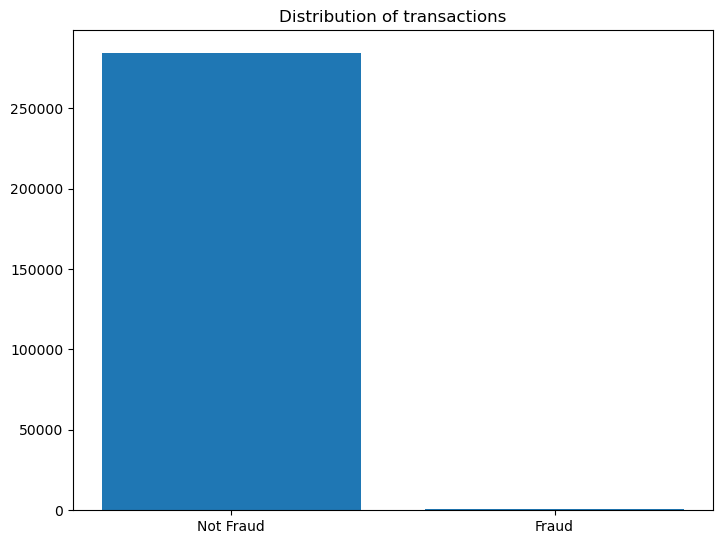

In [30]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
types = ['Not Fraud', 'Fraud']
nums = [o_zero, o_one]
ax.bar(types, nums)
plt.title("Distribution of transactions")
plt.show()


We can see a big disproportion in the number of occurences of fraudulent and non-fraudulent payments, so we can say that we are dealing with an imbalanced dataset. If not approached properly, this can cause a lot of errors and out model will probably overfit, since it would assume that most payments are not a fraud. What we want our model to do is to find patterns giving signs of fraudulent transactions.

To fight with the imbalances, we have decided to do under-sampling which meant creating a new subset consisting of 50/50 ratio of fraud and non-fraud transactions. The problem with this particular method is big information loss, since we are deleting most of our samples. Nevertheless we thought it was the best idea.

In [31]:
from sklearn.preprocessing import RobustScaler
rob_scaler = RobustScaler()
df['sc_Amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1, 1))
df['sc_Time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1, 1))
df.drop(['Time', 'Amount'], axis = 1, inplace = True)

In [32]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,sc_Amount,sc_Time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,1.783274,-0.994983
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.269825,-0.994983
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,4.983721,-0.994972
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,1.418291,-0.994972
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,0.670579,-0.994960


In [33]:
df = df.sample(frac = 1)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,sc_Amount,sc_Time
53131,-0.684136,-0.082921,1.519497,-1.133678,0.314933,0.523647,-0.473427,0.283966,-1.593437,0.614781,0.529566,-0.912992,-0.421381,0.068033,0.931383,0.991590,0.286821,-0.786077,2.204646,0.231588,-0.032475,-0.303044,-0.262624,-1.178306,0.037700,-0.222486,-0.037306,0.074602,0,-0.249703,-0.456596
192317,-0.556886,2.166559,-0.351678,3.908402,1.619470,0.862943,1.113432,-0.296879,-2.348084,2.681871,0.411578,0.033315,0.931131,0.445778,-0.071911,-0.242778,-0.441729,0.392921,1.702187,0.100097,0.206889,0.604067,-0.024547,0.209093,-0.903477,0.120933,-1.022321,-0.288830,0,-0.263537,0.528002
187634,-0.208956,0.945743,0.046367,-0.841076,0.619636,-0.619258,0.850138,-0.011291,-0.051116,0.078253,0.409874,0.597117,-0.217237,0.257482,-1.035764,0.205555,-0.797474,-0.117506,0.325565,0.090874,-0.269370,-0.571184,0.012658,-0.422106,-0.425064,0.150641,0.352292,0.140709,0,-0.289387,0.504270
111573,-0.375649,0.936184,1.245035,0.094421,-0.139514,-1.041596,0.577690,0.040690,-0.092887,-0.455933,-0.551734,-1.140001,-1.876557,-0.029872,1.114459,0.476599,0.122847,0.109623,-0.079199,0.008574,-0.280195,-0.854968,0.030805,0.278683,-0.224131,0.078342,0.229159,0.095125,0,-0.170195,-0.145831
168988,0.018934,0.788029,0.764164,-0.369425,0.664552,-0.986706,1.242142,-0.489184,-0.244735,-0.338916,-0.798518,0.086804,0.229388,-0.027328,-0.141752,-0.431280,-0.317594,-0.703923,0.521867,-0.002566,-0.220125,-0.365154,-0.013147,0.061857,-0.804027,0.151581,-0.030578,-0.035648,0,-0.294977,0.408640


In [34]:
fraud = df.loc[df['Class'] == 1]
non_fraud = df.loc[df['Class'] == 0][:492]

In [35]:
new_df = pd.concat([fraud, non_fraud])
new_df = new_df.sample(frac = 1)

In [36]:
new_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,sc_Amount,sc_Time
263080,2.132386,0.705608,-3.530759,0.514779,1.527175,-1.716268,1.132791,-0.574214,0.128904,-1.000805,-0.191191,-0.323794,-0.572456,-1.422064,0.314684,-0.387162,1.734742,0.610976,-0.221267,-0.211167,0.163739,0.703910,-0.245076,0.460049,0.920281,-0.216586,-0.026219,-0.025001,1,-0.293440,0.894031
176725,1.774423,-2.153857,-0.393196,-1.181708,-2.140107,-0.907154,-1.055374,-0.217072,-1.019285,1.403123,-0.526444,-0.531726,0.440220,-0.507895,0.113111,-0.395898,0.596462,-0.345791,-0.444073,0.017394,-0.230293,-0.708966,0.319493,0.340417,-0.767450,-0.530969,-0.002442,0.009480,0,3.148606,0.448689
17317,-27.848181,15.598193,-28.923756,6.418442,-20.346228,-4.828202,-19.210896,18.329406,-3.668735,-8.009159,4.303096,-6.008660,1.138969,-5.580447,-0.110737,-5.491073,-11.588544,-4.715420,0.734573,1.697856,1.802149,-2.062934,-1.269843,0.165409,1.999499,-0.211059,1.324809,0.388090,1,1.089779,-0.658690
96250,0.733021,-1.273817,0.523430,0.153553,-1.033371,0.485499,-0.462902,0.211229,1.039169,-0.387815,0.094672,0.769397,-0.359653,-0.262932,-0.863366,0.370909,-0.373370,0.231241,0.987855,0.451420,-0.086792,-0.622079,-0.254506,-0.421795,0.107606,0.950818,-0.089648,0.039238,0,3.379026,-0.223287
250989,-4.408398,-0.236207,-1.650221,-0.181402,-0.707062,-1.374459,0.320713,1.268070,-0.391377,-2.756018,-1.273609,0.291917,-0.260226,-0.452176,-0.579759,0.934286,1.592727,0.372413,-0.426562,-0.721973,-0.148089,-0.898865,-0.594786,-0.084053,0.807896,-0.093672,-0.563747,-0.768182,0,1.373856,0.827841


In [37]:
o_zero = new_df['Class'].value_counts()[0]
print(f'Number of non-fraudulent payments: {o_zero}')
o_one = new_df['Class'].value_counts()[1]
print(f'Number of fraudulent payments: {o_one}')

Number of non-fraudulent payments: 492
Number of fraudulent payments: 492


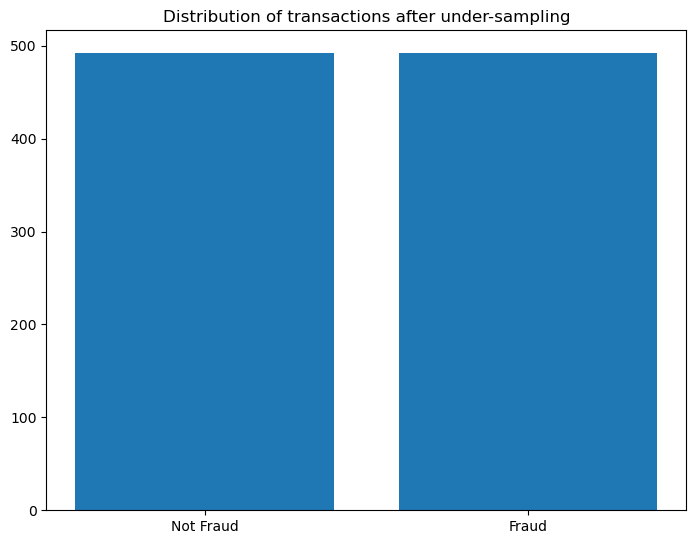

In [38]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
types = ['Not Fraud', 'Fraud']
nums = [o_zero, o_one]
ax.bar(types, nums)
plt.title("Distribution of transactions after under-sampling")
plt.show()


Having an imbalanced dataset causes miscalculations in variables correlations. Lets compare correlation heatmaps from the original dataset with the newly created one.

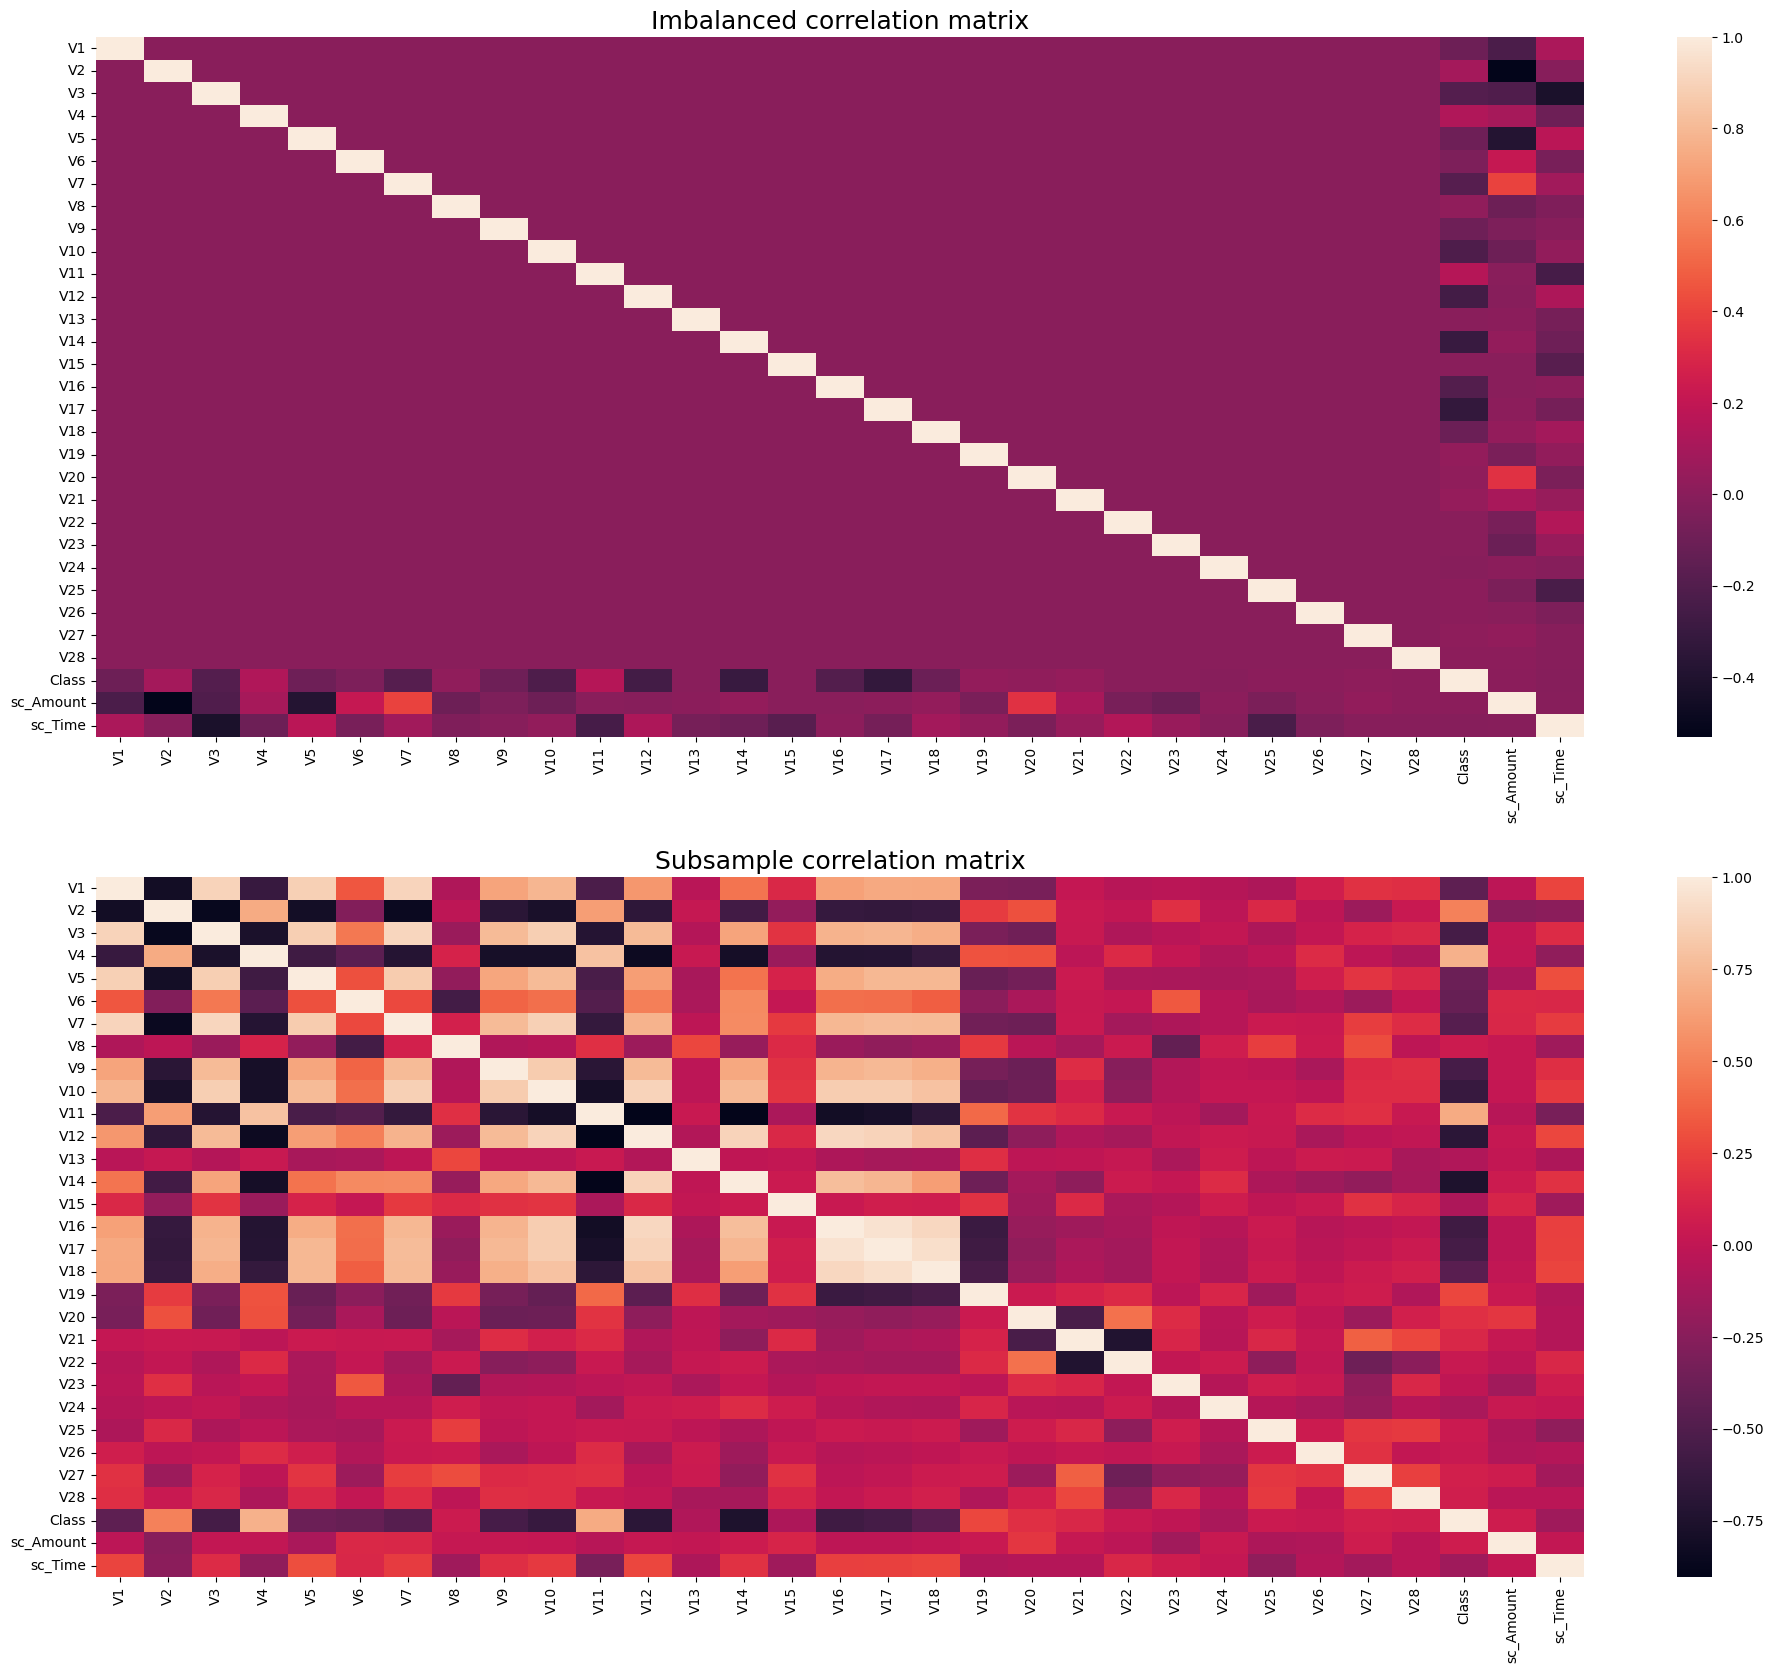

In [39]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize =(24, 20))
df_corr = df.corr()
new_df_corr = new_df.corr()
sns.heatmap(df_corr, ax = ax1, annot_kws={'size':20})
ax1.set_title("Imbalanced correlation matrix", fontsize = 18);
sns.heatmap(new_df_corr, annot_kws={'size':20}, ax = ax2)
ax2.set_title("Subsample correlation matrix", fontsize = 18);


We can clearly see that there are almost no correlations in the original dataset, but that is what we have expected. In the subsample there are both positive and negative correlations notable. Positive correlations mean that the higher the value, the more likely the transaction is fraud and vice versa

Before we jump to predicting the frauds, we have to look for potential outliers that would distort our results

In [40]:
X = new_df.drop('Class', axis = 1)
y = new_df['Class']

In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [42]:
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier()
}


In [45]:
for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv = 5)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

Classifiers:  LogisticRegression Has a training score of 94.0 % accuracy score
Classifiers:  KNeighborsClassifier Has a training score of 94.0 % accuracy score
Classifiers:  SVC Has a training score of 94.0 % accuracy score
Classifiers:  DecisionTreeClassifier Has a training score of 90.0 % accuracy score


In [46]:
# Use GridSearchCV to find the best parameters.
from sklearn.model_selection import GridSearchCV


# Logistic Regression 
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}



grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(X_train, y_train)
# We automatically get the logistic regression with the best parameters.
log_reg = grid_log_reg.best_estimator_

knears_params = {"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}
grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params)
grid_knears.fit(X_train, y_train)
# KNears best estimator
knears_neighbors = grid_knears.best_estimator_

# Support Vector Classifier
svc_params = {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
grid_svc = GridSearchCV(SVC(), svc_params)
grid_svc.fit(X_train, y_train)

# SVC best estimator
svc = grid_svc.best_estimator_
# DecisionTree Classifier
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree.fit(X_train, y_train)

# tree best estimator
tree_clf = grid_tree.best_estimator_

In [47]:
log_reg_score = cross_val_score(log_reg, X_train, y_train, cv=5)
print('Logistic Regression Cross Validation Score: ', round(log_reg_score.mean() * 100, 2).astype(str) + '%')


knears_score = cross_val_score(knears_neighbors, X_train, y_train, cv=5)
print('Knears Neighbors Cross Validation Score', round(knears_score.mean() * 100, 2).astype(str) + '%')

svc_score = cross_val_score(svc, X_train, y_train, cv=5)
print('Support Vector Classifier Cross Validation Score', round(svc_score.mean() * 100, 2).astype(str) + '%')

tree_score = cross_val_score(tree_clf, X_train, y_train, cv=5)
print('DecisionTree Classifier Cross Validation Score', round(tree_score.mean() * 100, 2).astype(str) + '%')

Logistic Regression Cross Validation Score:  94.16%
Knears Neighbors Cross Validation Score 94.54%
Support Vector Classifier Cross Validation Score 93.65%
DecisionTree Classifier Cross Validation Score 93.02%
